# Explosion

In [1]:
import numpy as np
from hedgehog.expl import *

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%aimport hedgehog.expl
%autoreload 1

### Fizzle

In [2]:
delta = 1/3
def d_theta_sigma(sigma, theta):
    y = delta * np.exp(theta[0][0]) - theta
    return y

#### Long time approximation

In [4]:
def f(x):
    y = np.exp(x) - x/delta
    return y

def fp(x):
    y = np.exp(x) - 1/delta
    return y

x0 = 0.5
theta_fiz = newton_raphson(f, fp, x0, max_iter=None, tol=1e-4, isVerbose=True)
print(theta_fiz)

Iter:   1	 Best Guess: 0.6100597
Iter:   2	 Best Guess: 0.6189968
Iter:   3	 Best Guess: 0.6190613
Iter:   4	 Best Guess: 0.6190613
Converged
Error: 0.00000001
0.6190612867359451


#### Short time approximation

In [4]:
def short_approx(sigma):
    del_1 = delta - 1
    theta = delta / (del_1) * (np.exp(del_1 * sigma) - 1)
    return theta

#### Overall

In [5]:
x0 = 0
y0 = np.array([[0]])
system = np.array([d_theta_sigma])
xf = 20
h = 0.05
u, U_fiz, T_fiz = runge_kutta_4(system, y0, h, x0, xf, isVerbose=False, retAll=True)

verbose = False
if verbose:
    for idx, t in enumerate(T_fiz):
        print("{:.2f} & {:.7f} \\\\".format(t, U_fiz[idx][0][0]))

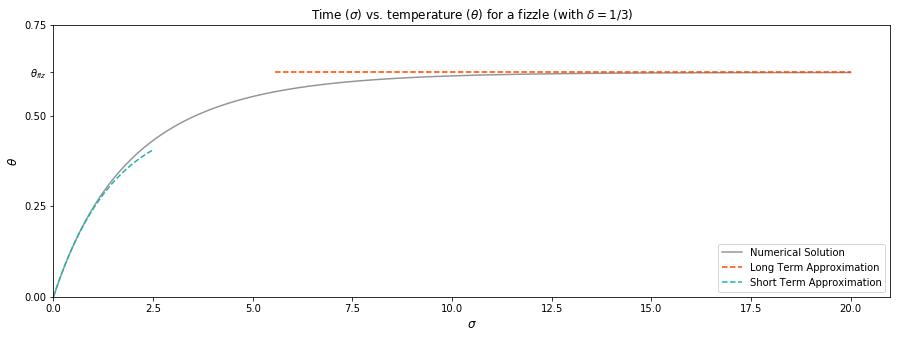

In [7]:
X_fiz = T_fiz
Y_fiz = []
X_fiz_long = []
Y_fiz_long = []
X_fiz_short = []
Y_fiz_short = []

for u in U_fiz:
    Y_fiz.append(u[0][0])
for x in X_fiz:
    if x <= 2.5:
        X_fiz_short.append(x)
        Y_fiz_short.append(short_approx(x))
    if x >= 5.5:
        X_fiz_long.append(x)
        Y_fiz_long.append(theta_fiz)

plt.figure(figsize=(15,5))
plt.title(r"Time ($\sigma$) vs. temperature ($\theta$) for a fizzle (with $\delta = 1/3$)", fontsize=12)
plt.xlabel(r"$\sigma$", fontsize=12)
plt.ylabel(r"$\theta$", fontsize=12)
plt.ylim(0,0.75)
plt.xlim(0,np.max(X_fiz)+1)
plt.yticks([0.0, 0.25, 0.5, theta_fiz, 0.75], ('0.00', '0.25', '0.50', r'$\theta_{fiz}$', '0.75'))
plt.plot(X_fiz, Y_fiz, markersize=10, color="dimgrey", alpha=0.7, label='Numerical Solution')
plt.plot(X_fiz_long, Y_fiz_long, linestyle="dashed", color="orangered", label='Long Term Approximation')
plt.plot(X_fiz_short, Y_fiz_short, linestyle="dashed", color="lightseagreen", label='Short Term Approximation')
plt.legend(loc='lower right')
# plt.show()
plt.savefig("../expl/img/fizzle.PNG", dpi=200)

### Explosion

In [5]:
delta = 1
def d_sigma_theta(theta, sigma):
    y = delta * np.exp(theta) - theta
    y = 1 / y
    return y

#### Long Term

In [32]:
def f(theta):
    y = delta * np.exp(theta) - theta
    y = 1 / y
    return y

verbose=False
if verbose:
    inf = 25
    h = 0.01
    for a in range(1, inf):
        sigma_expl = simpson_1_3(f, 0, a, h)
        print("{} & {:.8f} \\\\".format(a, sigma_expl))
    
inf = 38
sigma_expl = simpson_1_3(f, 0, inf, h)
print(sigma_expl)

def long_term(theta):
    y = sigma_expl - 1 / (delta * np.exp(theta))
    return y

1.3590982771691158


#### Short Term

In [10]:
def short_term(theta):
    y = theta
    return y

#### Overall

In [11]:
x0 = 0
y0 = np.array([[0]])
system = np.array([d_sigma_theta])
xf = 10
h = 0.01
u, U_exp, T_exp = runge_kutta_4(system, y0, h, x0, xf, isVerbose=False, retAll=True)

verbose = False
if verbose:
    for idx, t in enumerate(T_exp):
        print("{:.2f} & {:.7f} \\\\".format(t, U_exp[idx][0][0]))

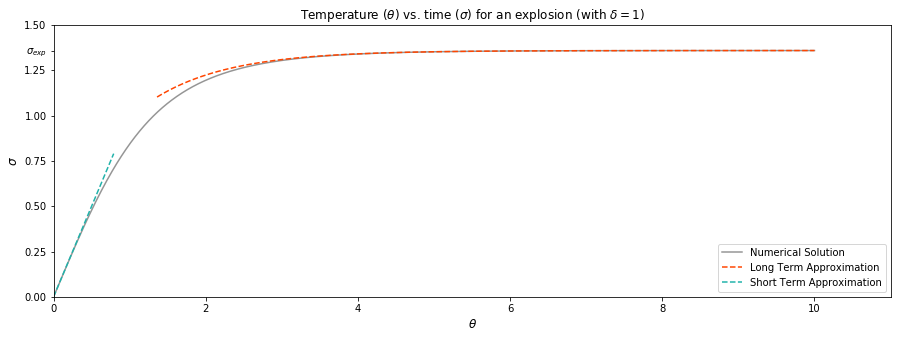

In [12]:
X_exp = T_exp
Y_exp = []
X_exp_long = []
Y_exp_long = []
X_exp_short = []
Y_exp_short = []

for u in U_exp:
    Y_exp.append(u[0][0])
for x in X_exp:
    if x <= 0.8:
        X_exp_short.append(x)
        Y_exp_short.append(short_term(x))
    if x >= sigma_expl:
        X_exp_long.append(x)
        Y_exp_long.append(long_term(x))

plt.figure(figsize=(15,5))
plt.title(r"Temperature ($\theta$) vs. time ($\sigma$) for an explosion (with $\delta = 1$)", fontsize=12)
plt.xlabel(r"$\theta$", fontsize=12)
plt.ylabel(r"$\sigma$", fontsize=12)
plt.ylim(0,1.5)
plt.xlim(0,np.max(X_exp)+1)
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, sigma_expl, 1.5],
           ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', r'$\sigma_{exp}$', '1.50'])
plt.plot(X_exp, Y_exp, markersize=10, color="dimgrey", alpha=0.7, label='Numerical Solution')
plt.plot(X_exp_long,Y_exp_long, linestyle="dashed", color="orangered", label='Long Term Approximation')
plt.plot(X_exp_short, Y_exp_short, linestyle="dashed", color="lightseagreen", label='Short Term Approximation')
plt.legend(loc='lower right')
# plt.show()
plt.savefig('../expl/img/explosion.PNG', dpi=200)

### Both plots on same graph

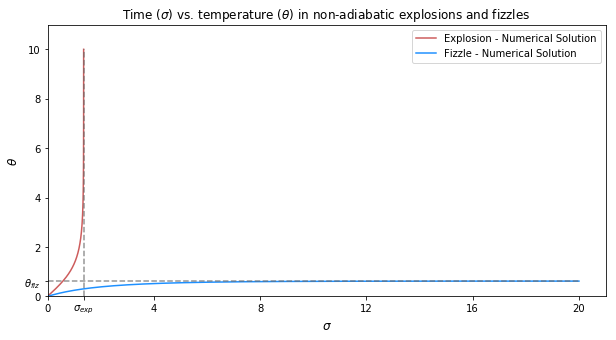

In [13]:
Theta_Fiz = []
for x in X_fiz:
    Theta_Fiz.append(theta_fiz)
Sigma_Exp = []
for x in X_exp:
    Sigma_Exp.append(sigma_expl)

plt.figure(figsize=(10,5))
plt.ylim(0, 11)
plt.xlim(0, 21)
plt.title(r"Time ($\sigma$) vs. temperature ($\theta$) in non-adiabatic explosions and fizzles")
plt.xlabel(r"$\sigma$", fontsize=12)
plt.ylabel(r"$\theta$", fontsize=12)
plt.xticks([0, sigma_expl, 4, 8, 12, 16, 20], ['0', r'$\sigma_{exp}$', '4', '8', '12', '16', '20'])
plt.yticks([0, theta_fiz, 2, 4, 6, 8, 10], ['0', r'$\theta_{fiz}$', '2', '4', '6', '8', '10'])
plt.plot(Y_exp, X_exp, markersize=10, color="indianred", alpha=1.0, label='Explosion - Numerical Solution')
plt.plot(X_fiz, Y_fiz, markersize=10, color="dodgerblue", alpha=1.0, label='Fizzle - Numerical Solution')
plt.plot(Sigma_Exp, X_exp, linestyle="dashed", color="dimgrey", alpha=0.7)
plt.plot(X_fiz, Theta_Fiz, linestyle="dashed", color="dimgrey", alpha=0.7)
plt.legend()
plt.savefig('../expl/img/exp-fiz-togther.PNG', dpi=200)

### More helper plots

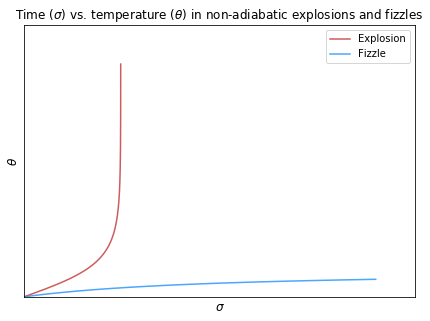

In [15]:
X_1 = T_exp[:900]
Y_1 = []
for u in U_exp[:900]:
    Y_1.append(u[0][0])

delta = 1/np.e
x0 = 0
y0 = np.array([[0]])
system = np.array([d_theta_sigma])
xf = 20
h = 0.05
u, U_fiz, T_fiz = runge_kutta_4(system, y0, h, x0, xf, isVerbose=False, retAll=True)

X_2 = T_fiz[:100]
Y_2 = []
for u in U_fiz[:100]:
    Y_2.append(u[0][0])
    

plt.figure(figsize=(7,5))
plt.title(r"Time ($\sigma$) vs. temperature ($\theta$) in non-adiabatic explosions and fizzles")
plt.xlabel(r"$\sigma$", fontsize=12)
plt.ylabel(r"$\theta$", fontsize=12)
plt.xlim(0,5.5)
plt.ylim(0,10.5)
plt.yticks([])
plt.xticks([])
plt.plot(Y_1, X_1, color='indianred', alpha=1.0, label='Explosion')
plt.plot(X_2, Y_2, color='dodgerblue', alpha=0.8, label='Fizzle')
plt.legend()
# plt.show()
plt.savefig("../expl/img/explosion-fizzle-example.PNG", dpi=200)

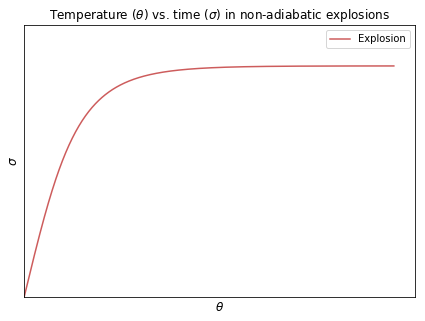

In [16]:
plt.figure(figsize=(7,5))
plt.title(r"Temperature ($\theta$) vs. time ($\sigma$) in non-adiabatic explosions")
plt.ylabel(r"$\sigma$", fontsize=12)
plt.xlabel(r"$\theta$", fontsize=12)
plt.xlim(0,9.5)
plt.ylim(0,1.6)
plt.yticks([])
plt.xticks([])
plt.plot(X_1, Y_1, color='indianred', alpha=1.0, label='Explosion')
plt.legend()
plt.savefig("../expl/img/flipped-explosion.PNG", dpi=200)